## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.


Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

We will need to classify the suspected fraudulent customers from an imbalanced dataset 

Step1: We will perform EDA with bar plots,scatter plots and correlatiom matrix .

Step2: we will perform the stratifiedshuffle split and create test and train and data.(To hanlde Data Imabalance)

Step3: we will Now use the powertransform to remove the skewness in the data

Step4: Build models with Unbalanced data and evaluate the model based on F1-Score ,Sensitivity,Specificity

Step5: Now with the Logistic regression model built we have to perform cross validation using GridserachCV and find out optimum hyperparameters for the model using cross validation

Step6: In order to handle the class imbalance better we need to use oversampling techniques to balance the dataset such as
 
 1.BorderlineSMOTE
 2.ADASYN
 3.RandomOverSampler 

Step6: In this project i have used the following four models (Step 5 and Step 6 will be repeated for the following models.
1.Logistic Regression
2.Decision Trees3.Random Forest4.XgBoost


In [3]:
import numpy as np
import pandas as pd
import pylab 
from scipy import stats

import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

## Exploratory data analysis

In [4]:
credit= pd.read_csv('creditcard.csv')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#observe the different feature type present in the data
credit.dtypes


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Here we will observe the distribution of our classes

In [6]:
#check Null values 
#No Null values are present so null value treatment  is not required
credit.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
classes=credit['Class'].value_counts()
normal_share=classes[0]/credit['Class'].count()*100
fraud_share=classes[1]/credit['Class'].count()*100

In [8]:
#print percentage of normal and fraud customers
print(normal_share,fraud_share)

99.82725143693798 0.1727485630620034


In [9]:
# define bar plot 
def per_bar_plot(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

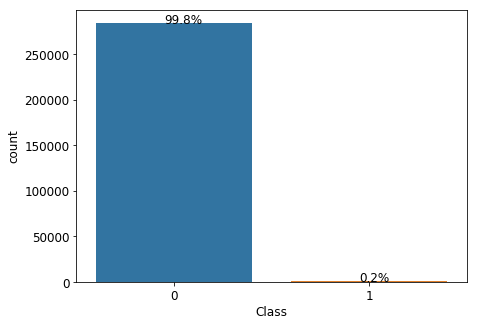

In [10]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcation
#Class vs Number ofTransactions
plt.figure(figsize=(7,5))
ax=sns.countplot('Class',data=credit)
plt.xticks(size= 12)
plt.xlabel('Class',size =12)
plt.yticks(size= 12)
plt.ylabel('count',size =12)

per_bar_plot(ax,credit.Class)


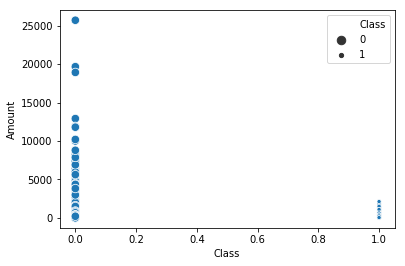

In [11]:
# Create a scatter plot to observe the distribution of classes with Amount
ax = sns.scatterplot(x='Class', y='Amount', size='Class', data=credit)


In [12]:
#from the above Scatter plot it is clear that we infer that Transactions which are fraud always tend to happend for Smaller Amounts
#which deviates from the normal reasoning may be for higher amounts there might be some additional secutity features that prevent frauds
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


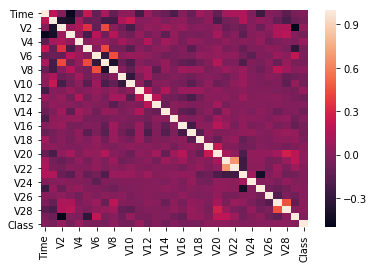

In [13]:
#Heat Map
heatmap = sns.heatmap(credit.corr(method='spearman'))

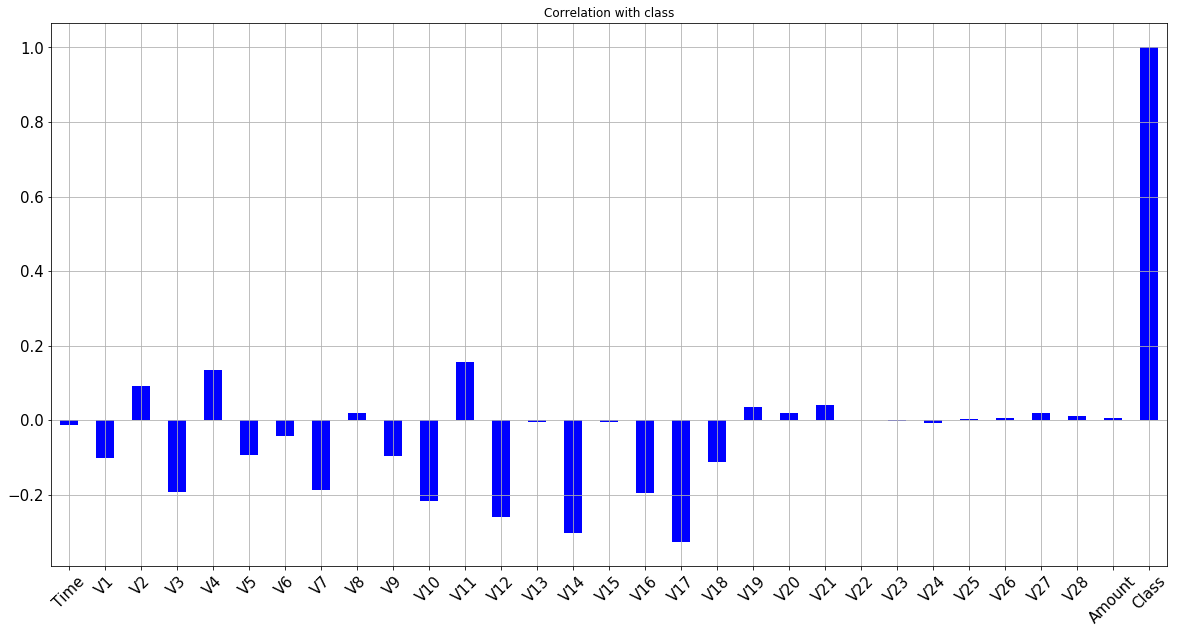

In [14]:
#since the columns are already transformed using PCA ,we will see a lower correlation between the variables and very low correlation between
#Class and other variable
#plot Correlation with Class
credit.corrwith(credit.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True, color=['blue'])
plt.show()



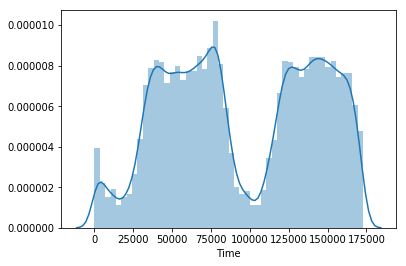

In [15]:
# Drop unnecessary columns
#since the time provided is a  kindoff offset of the transaction based on the previous transaction we may simply treat it 
#more like a serail number and proceed to delete it


sns.distplot(credit.Time)


In [16]:
#above plot illustrates us that transactions peak during day and reduce during night  and  from the correlation plot plotted above
#it has the least negative correlation or no correlation at all so we will proceed to delete this variable



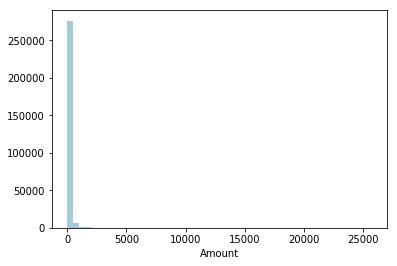

In [17]:
#plot of amount Vs Transactions

sns.distplot(credit.Amount,kde=False)

In [18]:
#in the above distribution plot it is clear that Lower amount value transactions out number the high value transactions
#and from the correlation plot it has the least correlation so that we can goahead and remove this column too


In [19]:
#backup the original dataset
credit_bkp=credit.copy()



In [20]:
#credit=credit_bkp

In [21]:
#delete the columns Time and Amount from the dataset as they dont have correlation and will not contribute to modeling 
credit=credit.drop(['Time','Amount'],axis=1)

In [22]:
#Get  X and y
y=credit['Class']
X=credit.drop('Class',axis=1)

In [23]:
X_bkp=X.copy()
y_bkp=y.copy()

In [24]:
#Get Train and test data using Straified shuffle 
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
for train_index, test_index in sss.split(X, y):
    print("TRAIN:",train_index,"TEST:",test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    



TRAIN: [211605 231628 110643 ... 269968 175960  47973] TEST: [170978  96185  30469 ... 184018  64742 259262]


In [25]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(199364, 28) (85443, 28) (199364,) (85443,)


In [26]:
X_train_ori=X_train.copy()
X_test_ori=X_test.copy()
y_train_ori=y_train.copy()
y_test_ori=y_test.copy()

In [27]:
y_test.head()

170978    0
96185     0
30469     0
266925    0
14185     0
Name: Class, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb44009d470>,
      dtype=object)

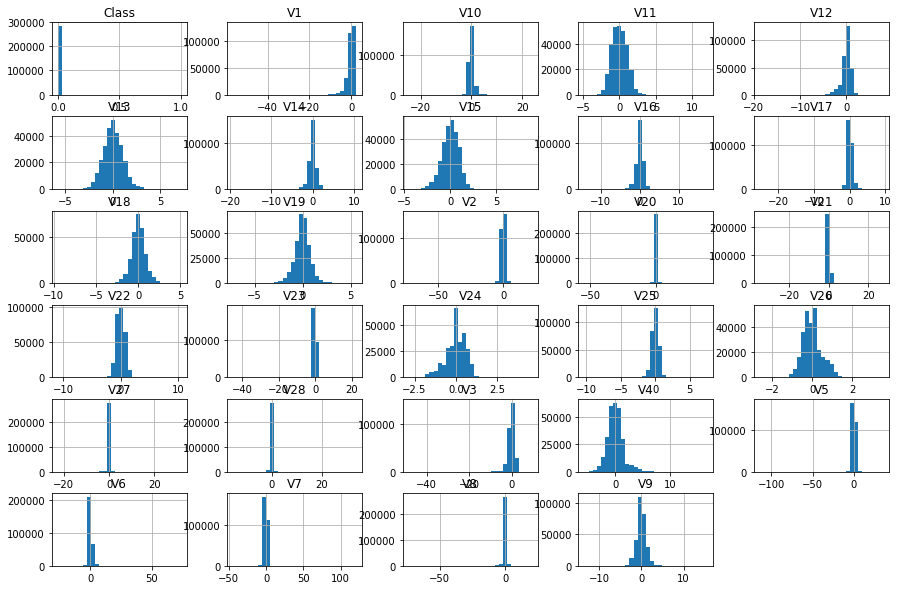

In [28]:
#identify the Skewness in the data
credit.hist(bins=30, figsize=(15, 10))

In [29]:
# from the above plots it is clear that the following varibles are highly skewed V1,V11,V12,V15,V2,V17,V22,V26
# We will use power transformation to reduce the skew 



##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [30]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [31]:
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

In [32]:
x_train_pt1=pd.DataFrame(X_train_pt,columns=X_train.columns)
x_test_pt1=pd.DataFrame(X_test_pt,columns=X_test.columns)
#y_train_pt1=pd.DataFrame(y_train_pt,columns='Class')
#y_test_pt1=pd.DataFrame(y_test_pt,columns='Class')

In [33]:
print(x_train_pt1.shape,x_test_pt1.shape)

(199364, 28) (85443, 28)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb42a4a9cc0>,
      dtype=object)

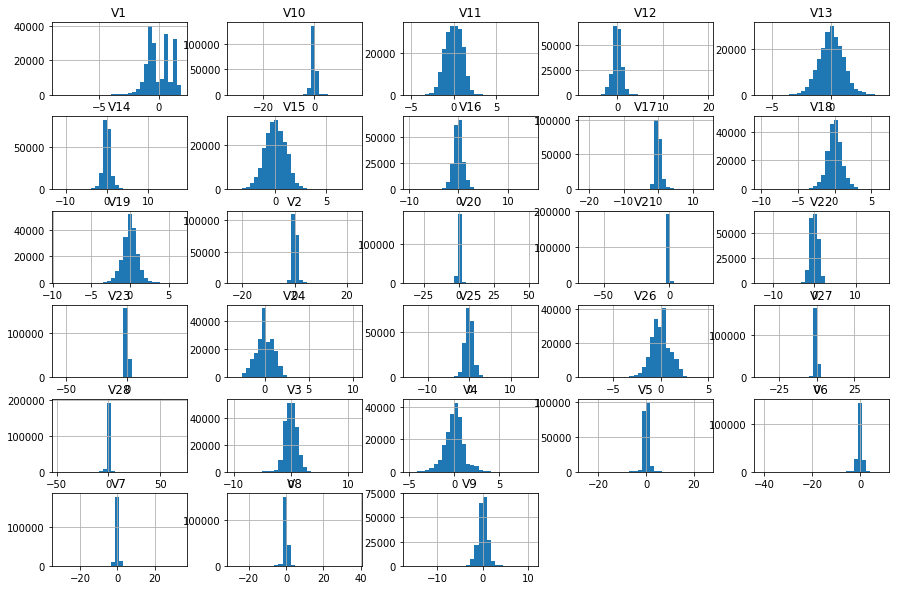

In [34]:
# plot the histogram of a variable from the dataset again to see the result
#identify the Skewness in the data
x_train_pt1.hist(bins=30, figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4277f39e8>,
      dtype=object)

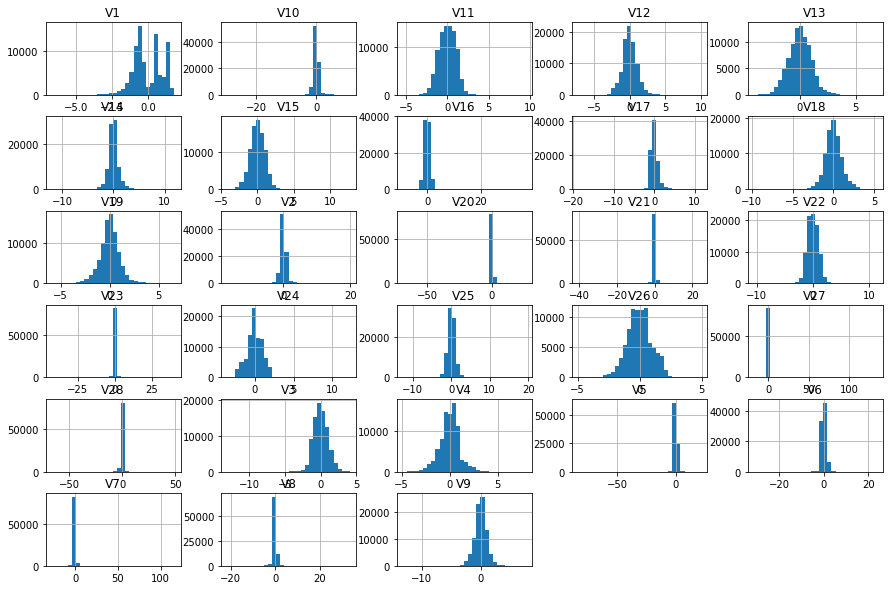

In [35]:
# plot the histogram of a variable from the dataset again to see the result
#identify the Skewness in the data
x_test_pt1.hist(bins=30, figsize=(15, 10))

In [36]:
#from the above plots we can claerly see that Skewness is handled correctly after we apply the power transformation

## Model Building
- Build different models on the imbalanced dataset and see the result

In [37]:
#instantiate a logistic regression model  and fit with X-Train and Y-train
from sklearn.linear_model import LogisticRegression
M_Log_Reg=LogisticRegression()
M_Log_Reg=M_Log_Reg.fit(x_train_pt1,y_train)


In [38]:
# check the accuracy on the training set
print("accuracy on the training set:",M_Log_Reg.score(x_train_pt1, y_train))

# check the accuracy on the test dataset
print("accuracy on the testing set:",M_Log_Reg.score(x_test_pt1, y_test))

accuracy on the training set: 0.9992576392929516
accuracy on the testing set: 0.999204147794436


In [39]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [40]:
#predict Class Values on Train and Test data
y_pred_train=M_Log_Reg.predict(x_train_pt1)
y_pred_test=M_Log_Reg.predict(x_test_pt1)



In [41]:
#print confusion matrix for Train data
print(confusion_matrix(y_pred_train,y_train))

[[198990    118]
 [    30    226]]


In [42]:
#print confusion matrix for Test data
print(confusion_matrix(y_pred_test,y_test))

[[85282    55]
 [   13    93]]


In [43]:
#since our model is highly imbalanced if we go by accuracy since we have class 0 as the major classifier we will have a greater accuracy
#but our ability to predict the Fraud cases we need a metric which uses both precision and  recall may be F1 score will be a good method to
#to evaluate the models

In [44]:
#print classification report
print (classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85337
           1       0.63      0.88      0.73       106

    accuracy                           1.00     85443
   macro avg       0.81      0.94      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [45]:
#we could see that we can acheive a f1 score of 0.73  with a simple logictic regression
#ROC, AUC
from sklearn.metrics import roc_curve, auc
y_score = M_Log_Reg.predict_proba(x_test_pt1)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)



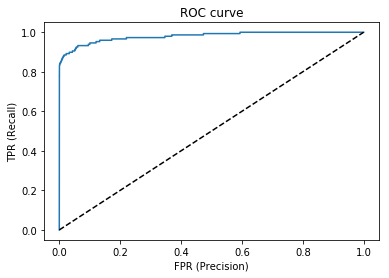

Area under curve (AUC):  0.9795657519293137


In [46]:
#plot ROC curve
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [47]:
# We have a pretty good value if AUC but the value of F1-Score is not that great we will try with cross validation
print(x_train_pt1.shape,y_train.shape)


(199364, 28) (199364,)


# Perform Cross Validation in Logistic regression model with C_Values and solver combination and choose the model with best F1-Score

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
solvers = ['liblinear','lbfgs']
c_values = [10, 1.0, 0.1]
parameters = dict(solver=solvers,C=c_values)

clf = GridSearchCV(M_Log_Reg, parameters, n_jobs=1, cv=5, scoring='f1',error_score=0)
clf.fit(x_train_pt1, y_train_ori)

log_reg_model = clf.best_estimator_

#print (clf.best_score_, clf.best_params_) 
# summarize results
print("Best: %f using %s" % (clf.best_score_, clf.best_params_))
means = clf.cv_results_['mean_test_score']
params = clf.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

Best: 0.754551 using {'C': 10, 'solver': 'liblinear'}
0.754551 with: {'C': 10, 'solver': 'liblinear'}
0.754551 with: {'C': 10, 'solver': 'lbfgs'}
0.754551 with: {'C': 1.0, 'solver': 'liblinear'}
0.754551 with: {'C': 1.0, 'solver': 'lbfgs'}
0.747027 with: {'C': 0.1, 'solver': 'liblinear'}
0.750440 with: {'C': 0.1, 'solver': 'lbfgs'}


In [63]:
log_reg_model

LogisticRegression(C=10, max_iter=1000)

# Evaluation metrics on the Best model Obtained After Cross Validation and Hyper Parameter Tuning

[[198990     30]
 [   118    226]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199108
           1       0.66      0.88      0.75       256

    accuracy                           1.00    199364
   macro avg       0.83      0.94      0.88    199364
weighted avg       1.00      1.00      1.00    199364

[[85282    13]
 [   55    93]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85337
           1       0.63      0.88      0.73       106

    accuracy                           1.00     85443
   macro avg       0.81      0.94      0.87     85443
weighted avg       1.00      1.00      1.00     85443



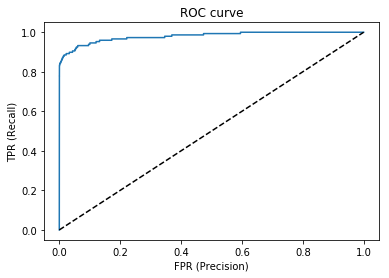

Area under curve (AUC):  0.979537075618323


In [70]:
#predict y values based on Train data using cross validation
y_pred_train_cv=log_reg_model.predict(x_train_pt1)

#confusion matrix for train data using cross validation
conf_mat = confusion_matrix(y_train_ori, y_pred_train_cv)
print(conf_mat)



#classification report on Train_data data
print(classification_report(y_pred_train_cv,y_train_ori))


#predict Y values based on Test Data using cross validation
y_pred_test_cv=log_reg_model.predict(x_test_pt1)

#confusion matrix for test data using cross validation
conf_mat = confusion_matrix(y_test_ori, y_pred_test_cv)


#print values of confusin matrix-Test data
print(conf_mat)


#classification report on Test data
print(classification_report(y_pred_test_cv,y_test_ori))

#Draw ROC  AND AUC
from sklearn.metrics import roc_curve, auc
y_score = log_reg_model.predict_proba(x_test_pt1)[:,1]
fpr, tpr, _ = roc_curve(y_test_ori, y_score)


import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))


# Here we dont see a significant improvement in the f1-Score we will proceed with Oversampling Methods and Evaluate the results


# Build Model Using logistic regression  with balanced data using Oversampling Techniques


# BorderlineSMOTE

In [71]:
y_train[y_train==0].shape,y_train[y_train==1].shape,y_test[y_test==0].shape,y_test[y_test==1].shape

((199020,), (199021,), (85295,), (85294,))

[[197494   1411]
 [  1526 197609]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    198905
           1       0.99      0.99      0.99    199135

    accuracy                           0.99    398040
   macro avg       0.99      0.99      0.99    398040
weighted avg       0.99      0.99      0.99    398040



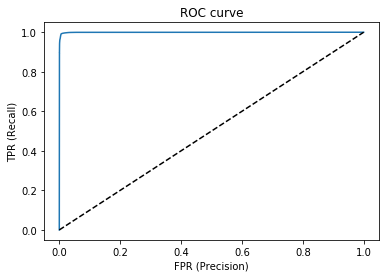

Area under curve (AUC):  0.9994347523067029
[[84579  7554]
 [  716 77741]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     92133
           1       0.91      0.99      0.95     78457

    accuracy                           0.95    170590
   macro avg       0.95      0.95      0.95    170590
weighted avg       0.95      0.95      0.95    170590



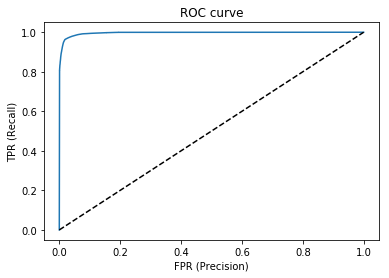

Area under curve (AUC):  0.9964794138098888


In [72]:
#we will now try with BorderlineSMOTE  as one of the oversampling techniques to see how we can imorove f1-score
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)

#X_res, y_res = sm.fit_resample(X_bkp, y_bkp)
X_train, y_train = sm.fit_resample(x_train_pt1, y_train_ori)
X_test, y_test = sm.fit_resample(x_test_pt1, y_test_ori)


# #split train and test data
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
# for train_index, test_index in sss.split(X_res, y_res):
#     print("TRAIN:",train_index,"TEST:",test_index)
#     X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
#     y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    
#Train Model with with Resampled data    
M_Log_reg = log_reg_model.fit(X_train, y_train)

#get Predicted Value for Train data
y_train_pred = M_Log_reg.predict(X_train)


#print confusion matrix for Test data
print(confusion_matrix(y_train_pred, y_train))
print(classification_report(y_train_pred, y_train))


from sklearn.metrics import roc_curve, auc
y_score = M_Log_reg.predict_proba(X_train)[:,1]
fpr, tpr, _ = roc_curve(y_train, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))



#get Predicted Value for Test data
y_test_pred = M_Log_reg.predict(X_test)


#print confusion matrix for Test data
print(confusion_matrix(y_test_pred, y_test))
print(classification_report(y_test_pred, y_test))



from sklearn.metrics import roc_curve, auc
y_score = M_Log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

    

#we see when we use BorderlineSMOTE there is a drastic improvement in the F1-Score  and it is a very good candidate for the best  model



# We will check with ADASYN now

[[181921  26559]
 [ 17099 172417]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89    208480
           1       0.87      0.91      0.89    189516

    accuracy                           0.89    397996
   macro avg       0.89      0.89      0.89    397996
weighted avg       0.89      0.89      0.89    397996



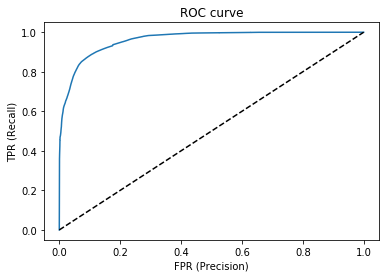

Area under curve (AUC):  0.96180031729544
[[78000 11223]
 [ 7295 74077]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     89223
           1       0.87      0.91      0.89     81372

    accuracy                           0.89    170595
   macro avg       0.89      0.89      0.89    170595
weighted avg       0.89      0.89      0.89    170595



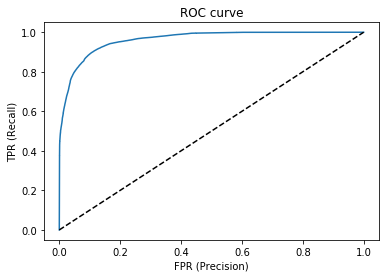

Area under curve (AUC):  0.9622096197824432


In [73]:
#we will now try with BorderlineSMOTE  as one of the oversampling techniques to see how we can imorove f1-score
from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state=42)

#X_res, y_res = sm.fit_resample(X_bkp, y_bkp)
X_train, y_train = sm.fit_resample(x_train_pt1, y_train_ori)
X_test, y_test = sm.fit_resample(x_test_pt1, y_test_ori)


# #split train and test data
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
# for train_index, test_index in sss.split(X_res, y_res):
#     print("TRAIN:",train_index,"TEST:",test_index)
#     X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
#     y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    
#Train Model with with Resampled data    
M_Log_reg = log_reg_model.fit(X_train, y_train)

#get Predicted Value for Train data
y_train_pred = M_Log_reg.predict(X_train)


#print confusion matrix for Test data
print(confusion_matrix(y_train_pred, y_train))
print(classification_report(y_train_pred, y_train))


from sklearn.metrics import roc_curve, auc
y_score = M_Log_reg.predict_proba(X_train)[:,1]
fpr, tpr, _ = roc_curve(y_train, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))



#get Predicted Value for Test data
y_test_pred = M_Log_reg.predict(X_test)


#print confusion matrix for Test data
print(confusion_matrix(y_test_pred, y_test))
print(classification_report(y_test_pred, y_test))



from sklearn.metrics import roc_curve, auc
y_score = M_Log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

    

# for ADASYN we get an F1-Score of 0.88 which is Less than Borderline SMOTE

# we will check with RandomOverSampler Now

[[194362  14951]
 [  4658 184069]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95    209313
           1       0.92      0.98      0.95    188727

    accuracy                           0.95    398040
   macro avg       0.95      0.95      0.95    398040
weighted avg       0.95      0.95      0.95    398040



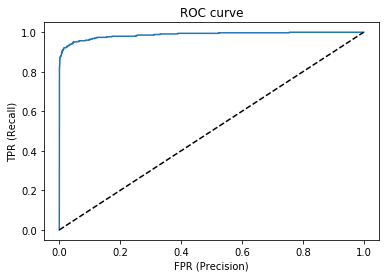

Area under curve (AUC):  0.9871876161889873
[[83259  8063]
 [ 2036 77232]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     91322
           1       0.91      0.97      0.94     79268

    accuracy                           0.94    170590
   macro avg       0.94      0.94      0.94    170590
weighted avg       0.94      0.94      0.94    170590



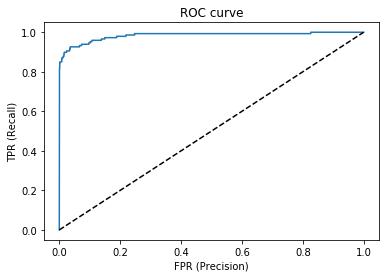

Area under curve (AUC):  0.9832718755991321


In [74]:
#we will now try with BorderlineSMOTE  as one of the oversampling techniques to see how we can imorove f1-score
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state=42)

#X_res, y_res = sm.fit_resample(X_bkp, y_bkp)
X_train, y_train = sm.fit_resample(x_train_pt1, y_train_ori)
X_test, y_test = sm.fit_resample(x_test_pt1, y_test_ori)


# #split train and test data
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
# for train_index, test_index in sss.split(X_res, y_res):
#     print("TRAIN:",train_index,"TEST:",test_index)
#     X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
#     y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    
#Train Model with with Resampled data    
M_Log_reg = log_reg_model.fit(X_train, y_train)

#get Predicted Value for Train data
y_train_pred = M_Log_reg.predict(X_train)


#print confusion matrix for Test data
print(confusion_matrix(y_train_pred, y_train))
print(classification_report(y_train_pred, y_train))


from sklearn.metrics import roc_curve, auc
y_score = M_Log_reg.predict_proba(X_train)[:,1]
fpr, tpr, _ = roc_curve(y_train, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))



#get Predicted Value for Test data
y_test_pred = M_Log_reg.predict(X_test)


#print confusion matrix for Test data
print(confusion_matrix(y_test_pred, y_test))
print(classification_report(y_test_pred, y_test))



from sklearn.metrics import roc_curve, auc
y_score = M_Log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))


#for RandomOverSampler We get an F1-Score of 0.94 which is better than ADASYN and here we have very high values of Sensitivity and Specificity


# Build Model Using Decision Tree with imbalanced data and Tune hyperparamerters with Crossvalidation using gridsearch

In [75]:
#implement Decision Tree with Imbalanced dataset and Hyperparamter Tuning with Cross Validation using GridsearchCV
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from pprint import pprint

parameters = {'max_depth':range(3,6),'criterion':['gini', 'entropy'],'splitter':['best', 'random']}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=1, cv=5, scoring='f1',error_score=0)
clf.fit(x_train_pt1, y_train_ori)


tree_model = clf.best_estimator_
#print (clf.best_score_, clf.best_params_) 

# summarize results
print("Best: %f using %s" % (clf.best_score_, clf.best_params_))
means = clf.cv_results_['mean_test_score']
params = clf.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

Best: 0.836333 using {'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}
0.802132 with: {'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}
0.697783 with: {'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}
0.836333 with: {'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}
0.757410 with: {'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}
0.827558 with: {'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}
0.734331 with: {'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}
0.813706 with: {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
0.650691 with: {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}
0.831186 with: {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}
0.706289 with: {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}
0.804788 with: {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
0.776973 with: {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}


[[198973     47]
 [    57    287]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199030
           1       0.83      0.86      0.85       334

    accuracy                           1.00    199364
   macro avg       0.92      0.93      0.92    199364
weighted avg       1.00      1.00      1.00    199364

[[85274    21]
 [   35   113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.76      0.84      0.80       134

    accuracy                           1.00     85443
   macro avg       0.88      0.92      0.90     85443
weighted avg       1.00      1.00      1.00     85443



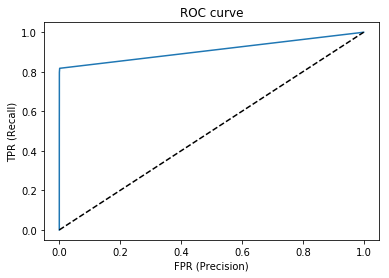

Area under curve (AUC):  0.908586733166134


In [76]:
# Evaluation metrics on the Best model Obtained After Cross Validation and Hyper Parameter Tuning

#predict y values based on Train data using cross validation
y_pred_train_cv=tree_model.predict(x_train_pt1)

#confusion matrix for train data using cross validation
conf_mat = confusion_matrix(y_train_ori, y_pred_train_cv)
print(conf_mat)



#classification report on Train_data data
print(classification_report(y_pred_train_cv,y_train_ori))


#predict Y values based on Test Data using cross validation
y_pred_test_cv=tree_model.predict(x_test_pt1)

#confusion matrix for test data using cross validation
conf_mat = confusion_matrix(y_test_ori, y_pred_test_cv)


#print values of confusin matrix-Test data
print(conf_mat)


#classification report on Test data
print(classification_report(y_pred_test_cv,y_test_ori))

#Draw ROC  AND AUC
from sklearn.metrics import roc_curve, auc
y_score = tree_model.predict_proba(x_test_pt1)[:,1]
fpr, tpr, _ = roc_curve(y_test_ori, y_score)


import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))


# Build Model Using Decision Tree with balanced data using Oversampling Techniques

[[196405    780]
 [  2615 198240]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197185
           1       1.00      0.99      0.99    200855

    accuracy                           0.99    398040
   macro avg       0.99      0.99      0.99    398040
weighted avg       0.99      0.99      0.99    398040



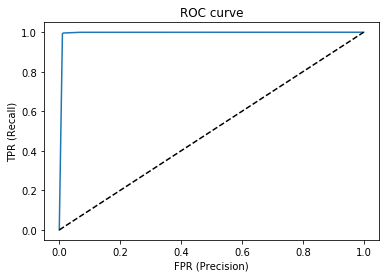

Area under curve (AUC):  0.9945564802680353
[[84171  8892]
 [ 1124 76403]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     93063
           1       0.90      0.99      0.94     77527

    accuracy                           0.94    170590
   macro avg       0.94      0.94      0.94    170590
weighted avg       0.95      0.94      0.94    170590



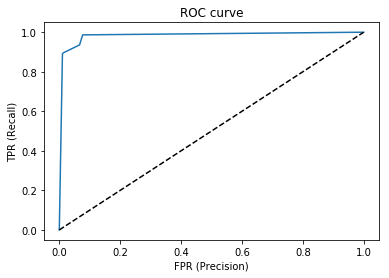

Area under curve (AUC):  0.98301373761771


In [77]:
# Here we dont see a significant improvement in the f1-Score we will proceed with Oversampling Methods and Evaluate the results


# BorderlineSMOTE

#we will now try with BorderlineSMOTE  as one of the oversampling techniques to see how we can imorove f1-score
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)

#X_res, y_res = sm.fit_resample(X_bkp, y_bkp)
X_train, y_train = sm.fit_resample(x_train_pt1, y_train_ori)
X_test, y_test = sm.fit_resample(x_test_pt1, y_test_ori)


# #split train and test data
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
# for train_index, test_index in sss.split(X_res, y_res):
#     print("TRAIN:",train_index,"TEST:",test_index)
#     X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
#     y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    
#Train Model with with Resampled data    
M_tree = tree_model.fit(X_train, y_train)

#get Predicted Value for Train data
y_train_pred = M_tree.predict(X_train)


#print confusion matrix for Test data
print(confusion_matrix(y_train_pred, y_train))
print(classification_report(y_train_pred, y_train))


from sklearn.metrics import roc_curve, auc
y_score = M_tree.predict_proba(X_train)[:,1]
fpr, tpr, _ = roc_curve(y_train, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))



#get Predicted Value for Test data
y_test_pred = M_tree.predict(X_test)


#print confusion matrix for Test data
print(confusion_matrix(y_test_pred, y_test))
print(classification_report(y_test_pred, y_test))



from sklearn.metrics import roc_curve, auc
y_score = M_tree.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

[[166372  16101]
 [ 32648 182875]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87    182473
           1       0.92      0.85      0.88    215523

    accuracy                           0.88    397996
   macro avg       0.88      0.88      0.88    397996
weighted avg       0.88      0.88      0.88    397996



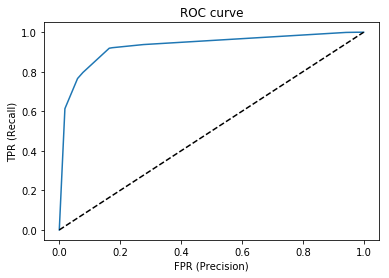

Area under curve (AUC):  0.9291072800021811
[[71167 11199]
 [14128 74101]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85     82366
           1       0.87      0.84      0.85     88229

    accuracy                           0.85    170595
   macro avg       0.85      0.85      0.85    170595
weighted avg       0.85      0.85      0.85    170595



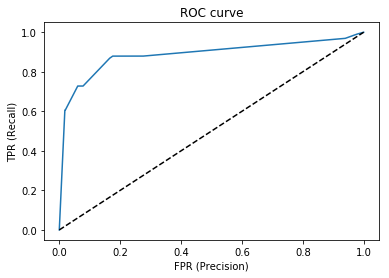

Area under curve (AUC):  0.8861316732831308


In [78]:
# We will check with ADASYN now

#we will now try with BorderlineSMOTE  as one of the oversampling techniques to see how we can imorove f1-score
from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state=42)

#X_res, y_res = sm.fit_resample(X_bkp, y_bkp)
X_train, y_train = sm.fit_resample(x_train_pt1, y_train_ori)
X_test, y_test = sm.fit_resample(x_test_pt1, y_test_ori)


# #split train and test data
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
# for train_index, test_index in sss.split(X_res, y_res):
#     print("TRAIN:",train_index,"TEST:",test_index)
#     X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
#     y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    
#Train Model with with Resampled data    
M_tree = tree_model.fit(X_train, y_train)

#get Predicted Value for Train data
y_train_pred = M_tree.predict(X_train)


#print confusion matrix for Test data
print(confusion_matrix(y_train_pred, y_train))
print(classification_report(y_train_pred, y_train))


from sklearn.metrics import roc_curve, auc
y_score = M_tree.predict_proba(X_train)[:,1]
fpr, tpr, _ = roc_curve(y_train, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))



#get Predicted Value for Test data
y_test_pred = M_tree.predict(X_test)


#print confusion matrix for Test data
print(confusion_matrix(y_test_pred, y_test))
print(classification_report(y_test_pred, y_test))



from sklearn.metrics import roc_curve, auc
y_score = M_tree.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))


[[192927  11346]
 [  6093 187674]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96    204273
           1       0.94      0.97      0.96    193767

    accuracy                           0.96    398040
   macro avg       0.96      0.96      0.96    398040
weighted avg       0.96      0.96      0.96    398040



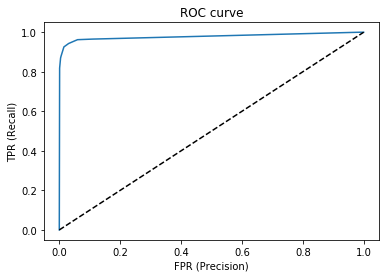

Area under curve (AUC):  0.9783765086018263
[[82695 11631]
 [ 2600 73664]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     94326
           1       0.86      0.97      0.91     76264

    accuracy                           0.92    170590
   macro avg       0.92      0.92      0.92    170590
weighted avg       0.92      0.92      0.92    170590



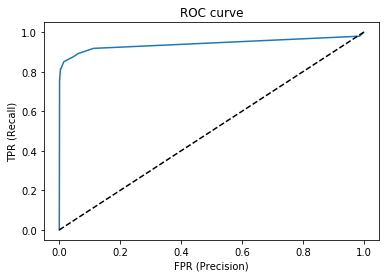

Area under curve (AUC):  0.9415114315811587


In [79]:
# for ADASYN we get an F1-Score of 0.88 which is Less than Borderline SMOTE

# we will check with RandomOverSampler Now

#we will now try with BorderlineSMOTE  as one of the oversampling techniques to see how we can imorove f1-score
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state=42)

#X_res, y_res = sm.fit_resample(X_bkp, y_bkp)
X_train, y_train = sm.fit_resample(x_train_pt1, y_train_ori)
X_test, y_test = sm.fit_resample(x_test_pt1, y_test_ori)


# #split train and test data
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
# for train_index, test_index in sss.split(X_res, y_res):
#     print("TRAIN:",train_index,"TEST:",test_index)
#     X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
#     y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    
#Train Model with with Resampled data    
M_tree = tree_model.fit(X_train, y_train)

#get Predicted Value for Train data
y_train_pred = M_tree.predict(X_train)


#print confusion matrix for Test data
print(confusion_matrix(y_train_pred, y_train))
print(classification_report(y_train_pred, y_train))


from sklearn.metrics import roc_curve, auc
y_score = M_tree.predict_proba(X_train)[:,1]
fpr, tpr, _ = roc_curve(y_train, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))



#get Predicted Value for Test data
y_test_pred = M_tree.predict(X_test)


#print confusion matrix for Test data
print(confusion_matrix(y_test_pred, y_test))
print(classification_report(y_test_pred, y_test))



from sklearn.metrics import roc_curve, auc
y_score = M_tree.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))


# #Build Model Using XGBOOST with imbalanced data and Tune hyperparamerters with Crossvalidation using gridsearch

In [114]:
from xgboost import XGBClassifier
Model_XGB = XGBClassifier(objective='reg:logistic')
Model_XGB.fit(x_train_pt1, y_train_ori)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='reg:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [119]:
num_majority_samples = y_train_ori[y_train_ori == 0].size
num_minority_samples = y_train_ori[y_train_ori == 1].size

scale_weight_ratio = num_majority_samples/num_minority_samples

parameters = {'max_depth':range(3,6),'scale_pos_weight':[scale_weight_ratio],'eta':[0.3, 0.03, 0.003]}


In [120]:
clf=GridSearchCV(Model_XGB, parameters, n_jobs=10, cv=5, scoring='f1',error_score=0)
clf.fit(x_train_pt1, y_train_ori)
XGB_model = clf.best_estimator_

In [121]:
print("Best: %f using %s" % (clf.best_score_, clf.best_params_))
means = clf.cv_results_['mean_test_score']
params = clf.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

Best: 0.860185 using {'eta': 0.3, 'max_depth': 5, 'scale_pos_weight': 578.546511627907}
0.807260 with: {'eta': 0.3, 'max_depth': 3, 'scale_pos_weight': 578.546511627907}
0.848012 with: {'eta': 0.3, 'max_depth': 4, 'scale_pos_weight': 578.546511627907}
0.860185 with: {'eta': 0.3, 'max_depth': 5, 'scale_pos_weight': 578.546511627907}
0.807260 with: {'eta': 0.03, 'max_depth': 3, 'scale_pos_weight': 578.546511627907}
0.848012 with: {'eta': 0.03, 'max_depth': 4, 'scale_pos_weight': 578.546511627907}
0.860185 with: {'eta': 0.03, 'max_depth': 5, 'scale_pos_weight': 578.546511627907}
0.807260 with: {'eta': 0.003, 'max_depth': 3, 'scale_pos_weight': 578.546511627907}
0.848012 with: {'eta': 0.003, 'max_depth': 4, 'scale_pos_weight': 578.546511627907}
0.860185 with: {'eta': 0.003, 'max_depth': 5, 'scale_pos_weight': 578.546511627907}


[[199020      0]
 [     0    344]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

[[85285    10]
 [   33   115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85318
           1       0.78      0.92      0.84       125

    accuracy                           1.00     85443
   macro avg       0.89      0.96      0.92     85443
weighted avg       1.00      1.00      1.00     85443



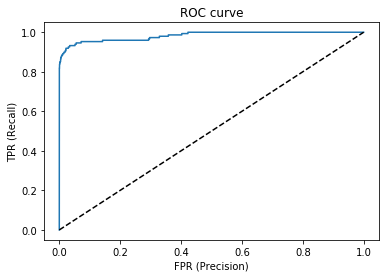

Area under curve (AUC):  0.9823537706180299


In [122]:
# Evaluation metrics on the Best model Obtained After Cross Validation and Hyper Parameter Tuning

#predict y values based on Train data using cross validation
y_pred_train_cv=XGB_model.predict(x_train_pt1)

#confusion matrix for train data using cross validation
conf_mat = confusion_matrix(y_train_ori, y_pred_train_cv)
print(conf_mat)



#classification report on Train_data data
print(classification_report(y_pred_train_cv,y_train_ori))


#predict Y values based on Test Data using cross validation
y_pred_test_cv=XGB_model.predict(x_test_pt1)

#confusion matrix for test data using cross validation
conf_mat = confusion_matrix(y_test_ori, y_pred_test_cv)


#print values of confusin matrix-Test data
print(conf_mat)


#classification report on Test data
print(classification_report(y_pred_test_cv,y_test_ori))

#Draw ROC  AND AUC
from sklearn.metrics import roc_curve, auc
y_score = XGB_model.predict_proba(x_test_pt1)[:,1]
fpr, tpr, _ = roc_curve(y_test_ori, y_score)


import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))


# Build Model Using  XGBOOST  with balanced data using Oversampling Techniques

# we will now try with BorderlineSMOTE

[[199020      0]
 [     0 199020]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



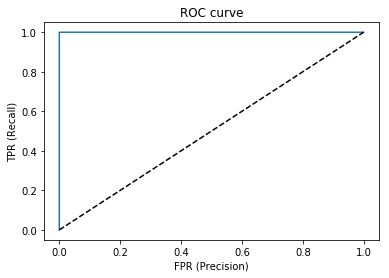

Area under curve (AUC):  1.0
[[85280 38093]
 [   15 47202]]
              precision    recall  f1-score   support

           0       1.00      0.69      0.82    123373
           1       0.55      1.00      0.71     47217

    accuracy                           0.78    170590
   macro avg       0.78      0.85      0.76    170590
weighted avg       0.88      0.78      0.79    170590



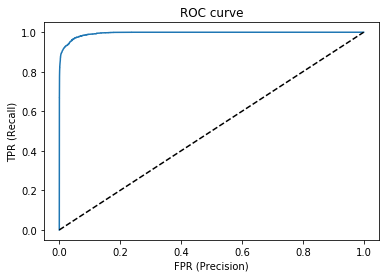

Area under curve (AUC):  0.9949150580423873


In [123]:
# Here we dont see a significant improvement in the f1-Score we will proceed with Oversampling Methods and Evaluate the results


# BorderlineSMOTE

#we will now try with BorderlineSMOTE  as one of the oversampling techniques to see how we can imorove f1-score
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)

#X_res, y_res = sm.fit_resample(X_bkp, y_bkp)
X_train, y_train = sm.fit_resample(x_train_pt1, y_train_ori)
X_test, y_test = sm.fit_resample(x_test_pt1, y_test_ori)


# #split train and test data
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
# for train_index, test_index in sss.split(X_res, y_res):
#     print("TRAIN:",train_index,"TEST:",test_index)
#     X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
#     y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
    

XGB_model_new = XGBClassifier(objective='reg:logistic',max_depth=5, scale_pos_weight=1)
#Train Model with with Resampled data    
M_XGB = XGB_model_new.fit(X_train, y_train)

#get Predicted Value for Train data
y_train_pred = M_XGB.predict(X_train)


#print confusion matrix for Test data
print(confusion_matrix(y_train_pred, y_train))
print(classification_report(y_train_pred, y_train))


from sklearn.metrics import roc_curve, auc
y_score = M_XGB.predict_proba(X_train)[:,1]
fpr, tpr, _ = roc_curve(y_train, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))



#get Predicted Value for Test data
y_test_pred = M_XGB.predict(X_test)


#print confusion matrix for Test data
print(confusion_matrix(y_test_pred, y_test))
print(classification_report(y_test_pred, y_test))



from sklearn.metrics import roc_curve, auc
y_score = M_XGB.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

[[198944      0]
 [    76 198976]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198944
           1       1.00      1.00      1.00    199052

    accuracy                           1.00    397996
   macro avg       1.00      1.00      1.00    397996
weighted avg       1.00      1.00      1.00    397996



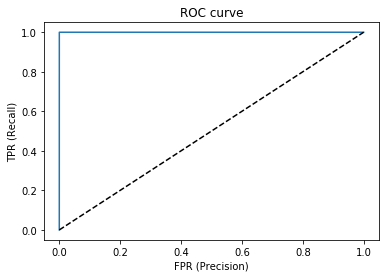

Area under curve (AUC):  0.9999982862840601
[[85218 35945]
 [   77 49355]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.83    121163
           1       0.58      1.00      0.73     49432

    accuracy                           0.79    170595
   macro avg       0.79      0.85      0.78    170595
weighted avg       0.88      0.79      0.80    170595



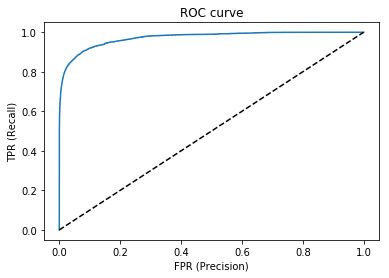

Area under curve (AUC):  0.9721398956947362


In [124]:
# We will check with ADASYN now

#we will now try with BorderlineSMOTE  as one of the oversampling techniques to see how we can imorove f1-score
from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state=42)

#X_res, y_res = sm.fit_resample(X_bkp, y_bkp)
X_train, y_train = sm.fit_resample(x_train_pt1, y_train_ori)
X_test, y_test = sm.fit_resample(x_test_pt1, y_test_ori)


# #split train and test data
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
# for train_index, test_index in sss.split(X_res, y_res):
#     print("TRAIN:",train_index,"TEST:",test_index)
#     X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
#     y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    
#Train Model with with Resampled data    
M_XGB = XGB_model_new.fit(X_train, y_train)

#get Predicted Value for Train data
y_train_pred = M_XGB.predict(X_train)


#print confusion matrix for Test data
print(confusion_matrix(y_train_pred, y_train))
print(classification_report(y_train_pred, y_train))


from sklearn.metrics import roc_curve, auc
y_score = M_XGB.predict_proba(X_train)[:,1]
fpr, tpr, _ = roc_curve(y_train, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))



#get Predicted Value for Test data
y_test_pred = M_XGB.predict(X_test)


#print confusion matrix for Test data
print(confusion_matrix(y_test_pred, y_test))
print(classification_report(y_test_pred, y_test))



from sklearn.metrics import roc_curve, auc
y_score = M_XGB.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))


[[199019      0]
 [     1 199020]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199019
           1       1.00      1.00      1.00    199021

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



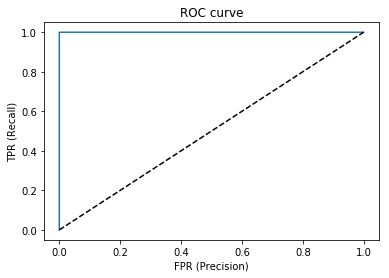

Area under curve (AUC):  1.0
[[85286 19172]
 [    9 66123]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    104458
           1       0.78      1.00      0.87     66132

    accuracy                           0.89    170590
   macro avg       0.89      0.91      0.89    170590
weighted avg       0.91      0.89      0.89    170590



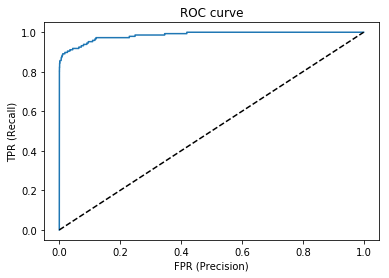

Area under curve (AUC):  0.9851416926172244


In [125]:
# for ADASYN we get an F1-Score of 0.88 which is Less than Borderline SMOTE

# we will check with RandomOverSampler Now

#we will now try with BorderlineSMOTE  as one of the oversampling techniques to see how we can imorove f1-score
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state=42)

#X_res, y_res = sm.fit_resample(X_bkp, y_bkp)
X_train, y_train = sm.fit_resample(x_train_pt1, y_train_ori)
X_test, y_test = sm.fit_resample(x_test_pt1, y_test_ori)


# #split train and test data
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
# for train_index, test_index in sss.split(X_res, y_res):
#     print("TRAIN:",train_index,"TEST:",test_index)
#     X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
#     y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    
#Train Model with with Resampled data    
M_XGB = XGB_model_new.fit(X_train, y_train)

#get Predicted Value for Train data
y_train_pred = M_XGB.predict(X_train)


#print confusion matrix for Test data
print(confusion_matrix(y_train_pred, y_train))
print(classification_report(y_train_pred, y_train))


from sklearn.metrics import roc_curve, auc
y_score = M_XGB.predict_proba(X_train)[:,1]
fpr, tpr, _ = roc_curve(y_train, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))



#get Predicted Value for Test data
y_test_pred = M_XGB.predict(X_test)


#print confusion matrix for Test data
print(confusion_matrix(y_test_pred, y_test))
print(classification_report(y_test_pred, y_test))



from sklearn.metrics import roc_curve, auc
y_score = M_XGB.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

# Build Model Using Random Forest with imbalanced data and Tune hyperparamerters with Crossvalidation using gridsearch

In [108]:
zero_samples = y_train_ori[y_train_ori == 0].size
one_samples = y_train_ori[y_train_ori == 1].size
n_samples = zero_samples + one_samples
n_classes = 2

zero_weight = n_samples / (n_classes * zero_samples)
one_weight = n_samples / (n_classes * one_samples)

from sklearn.ensemble import RandomForestClassifier

parameters = {'max_features':range(1,5),'n_estimators':[100,1000]}

clf = GridSearchCV(RandomForestClassifier(class_weight='balanced'), parameters, n_jobs=10, cv=5, scoring='f1',error_score=0)
clf.fit(x_train_pt1, y_train_ori)

rf_model = clf.best_estimator_

#print (clf.best_score_, clf.best_params_) 
# summarize results
print("Best: %f using %s" % (clf.best_score_, clf.best_params_))
means = clf.cv_results_['mean_test_score']
params = clf.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

Best: 0.846621 using {'max_features': 4, 'n_estimators': 1000}
0.793381 with: {'max_features': 1, 'n_estimators': 100}
0.794428 with: {'max_features': 1, 'n_estimators': 1000}
0.834053 with: {'max_features': 2, 'n_estimators': 100}
0.837460 with: {'max_features': 2, 'n_estimators': 1000}
0.839006 with: {'max_features': 3, 'n_estimators': 100}
0.841640 with: {'max_features': 3, 'n_estimators': 1000}
0.839050 with: {'max_features': 4, 'n_estimators': 100}
0.846621 with: {'max_features': 4, 'n_estimators': 1000}


[[199020      0]
 [     0    344]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

[[85290     5]
 [   43   105]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85333
           1       0.71      0.95      0.81       110

    accuracy                           1.00     85443
   macro avg       0.85      0.98      0.91     85443
weighted avg       1.00      1.00      1.00     85443



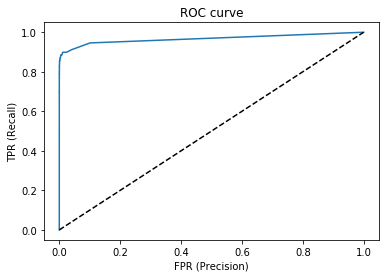

Area under curve (AUC):  0.9671319965841919


In [109]:
# Evaluation metrics on the Best model Obtained After Cross Validation and Hyper Parameter Tuning

#predict y values based on Train data using cross validation
y_pred_train_cv=rf_model.predict(x_train_pt1)

#confusion matrix for train data using cross validation
conf_mat = confusion_matrix(y_train_ori, y_pred_train_cv)
print(conf_mat)



#classification report on Train_data data
print(classification_report(y_pred_train_cv,y_train_ori))


#predict Y values based on Test Data using cross validation
y_pred_test_cv=rf_model.predict(x_test_pt1)

#confusion matrix for test data using cross validation
conf_mat = confusion_matrix(y_test_ori, y_pred_test_cv)


#print values of confusin matrix-Test data
print(conf_mat)


#classification report on Test data
print(classification_report(y_pred_test_cv,y_test_ori))

#Draw ROC  AND AUC
from sklearn.metrics import roc_curve, auc
y_score = rf_model.predict_proba(x_test_pt1)[:,1]
fpr, tpr, _ = roc_curve(y_test_ori, y_score)


import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))


# Build Model Using  Ransom Forest  with balanced data using Oversampling Techniques


[[199020      0]
 [     0 199020]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



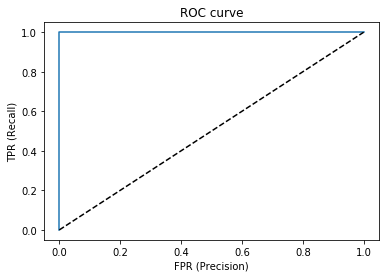

Area under curve (AUC):  1.0
[[85287 48924]
 [    8 36371]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78    134211
           1       0.43      1.00      0.60     36379

    accuracy                           0.71    170590
   macro avg       0.71      0.82      0.69    170590
weighted avg       0.88      0.71      0.74    170590



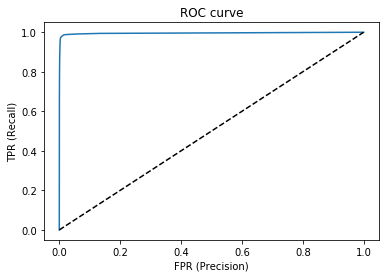

Area under curve (AUC):  0.9957102888341979


In [111]:
# Here we dont see a significant improvement in the f1-Score we will proceed with Oversampling Methods and Evaluate the results


# BorderlineSMOTE

#we will now try with BorderlineSMOTE  as one of the oversampling techniques to see how we can imorove f1-score
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)

#X_res, y_res = sm.fit_resample(X_bkp, y_bkp)
X_train, y_train = sm.fit_resample(x_train_pt1, y_train_ori)
X_test, y_test = sm.fit_resample(x_test_pt1, y_test_ori)


# #split train and test data
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
# for train_index, test_index in sss.split(X_res, y_res):
#     print("TRAIN:",train_index,"TEST:",test_index)
#     X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
#     y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    
#Train Model with with Resampled data    
M_RF = rf_model.fit(X_train, y_train)

#get Predicted Value for Train data
y_train_pred = M_RF.predict(X_train)


#print confusion matrix for Test data
print(confusion_matrix(y_train_pred, y_train))
print(classification_report(y_train_pred, y_train))


from sklearn.metrics import roc_curve, auc
y_score = M_RF.predict_proba(X_train)[:,1]
fpr, tpr, _ = roc_curve(y_train, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))



#get Predicted Value for Test data
y_test_pred = M_RF.predict(X_test)


#print confusion matrix for Test data
print(confusion_matrix(y_test_pred, y_test))
print(classification_report(y_test_pred, y_test))



from sklearn.metrics import roc_curve, auc
y_score = M_RF.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

[[199020      0]
 [     0 198976]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    198976

    accuracy                           1.00    397996
   macro avg       1.00      1.00      1.00    397996
weighted avg       1.00      1.00      1.00    397996



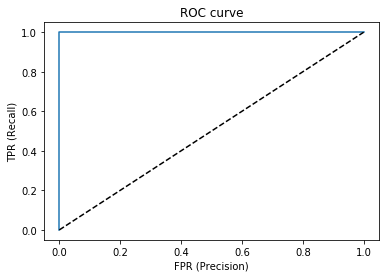

Area under curve (AUC):  1.0
[[85281 49187]
 [   14 36113]]
              precision    recall  f1-score   support

           0       1.00      0.63      0.78    134468
           1       0.42      1.00      0.59     36127

    accuracy                           0.71    170595
   macro avg       0.71      0.82      0.69    170595
weighted avg       0.88      0.71      0.74    170595



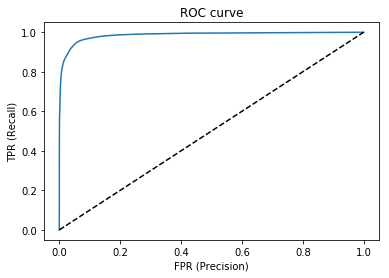

Area under curve (AUC):  0.9857782661333913


In [112]:
# We will check with ADASYN now

#we will now try with BorderlineSMOTE  as one of the oversampling techniques to see how we can imorove f1-score
from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state=42)

#X_res, y_res = sm.fit_resample(X_bkp, y_bkp)
X_train, y_train = sm.fit_resample(x_train_pt1, y_train_ori)
X_test, y_test = sm.fit_resample(x_test_pt1, y_test_ori)


# #split train and test data
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
# for train_index, test_index in sss.split(X_res, y_res):
#     print("TRAIN:",train_index,"TEST:",test_index)
#     X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
#     y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    
#Train Model with with Resampled data    
M_RF = rf_model.fit(X_train, y_train)

#get Predicted Value for Train data
y_train_pred = M_RF.predict(X_train)


#print confusion matrix for Test data
print(confusion_matrix(y_train_pred, y_train))
print(classification_report(y_train_pred, y_train))


from sklearn.metrics import roc_curve, auc
y_score = M_RF.predict_proba(X_train)[:,1]
fpr, tpr, _ = roc_curve(y_train, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))



#get Predicted Value for Test data
y_test_pred = M_RF.predict(X_test)


#print confusion matrix for Test data
print(confusion_matrix(y_test_pred, y_test))
print(classification_report(y_test_pred, y_test))



from sklearn.metrics import roc_curve, auc
y_score = M_RF.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))


[[199020      0]
 [     0 199020]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



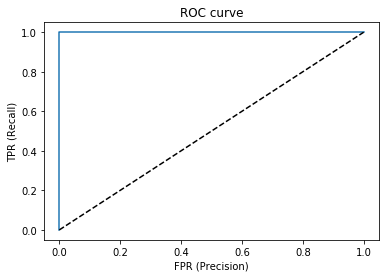

Area under curve (AUC):  1.0
[[85290 22113]
 [    5 63182]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.89    107403
           1       0.74      1.00      0.85     63187

    accuracy                           0.87    170590
   macro avg       0.87      0.90      0.87    170590
weighted avg       0.90      0.87      0.87    170590



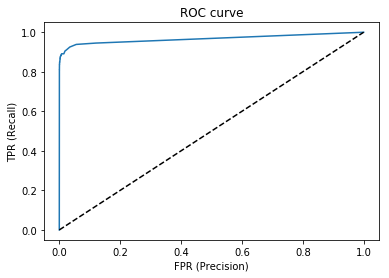

Area under curve (AUC):  0.9671598394417947


In [113]:
# for ADASYN we get an F1-Score of 0.88 which is Less than Borderline SMOTE

# we will check with RandomOverSampler Now

#we will now try with BorderlineSMOTE  as one of the oversampling techniques to see how we can imorove f1-score
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state=42)

#X_res, y_res = sm.fit_resample(X_bkp, y_bkp)
X_train, y_train = sm.fit_resample(x_train_pt1, y_train_ori)
X_test, y_test = sm.fit_resample(x_test_pt1, y_test_ori)


# #split train and test data
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
# for train_index, test_index in sss.split(X_res, y_res):
#     print("TRAIN:",train_index,"TEST:",test_index)
#     X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
#     y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    
#Train Model with with Resampled data    
M_RF = rf_model.fit(X_train, y_train)

#get Predicted Value for Train data
y_train_pred = M_RF.predict(X_train)


#print confusion matrix for Test data
print(confusion_matrix(y_train_pred, y_train))
print(classification_report(y_train_pred, y_train))


from sklearn.metrics import roc_curve, auc
y_score = M_RF.predict_proba(X_train)[:,1]
fpr, tpr, _ = roc_curve(y_train, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))



#get Predicted Value for Test data
y_test_pred = M_RF.predict(X_test)


#print confusion matrix for Test data
print(confusion_matrix(y_test_pred, y_test))
print(classification_report(y_test_pred, y_test))



from sklearn.metrics import roc_curve, auc
y_score = M_RF.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
import matplotlib.pyplot as plt

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))